In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
tragitti = pd.read_csv('csv/alldata.csv', index_col=False)
tragitti = tragitti[(tragitti['Car'] != 0) & (tragitti['FDistance'] != 0)]

In [2]:
pre_lock_condition = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_condition = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
print(len(tragitti[pre_lock_condition]), len(tragitti[post_lock_condition]))

(8347, 60083)


In [3]:
# Velocita' media durante il giorno
def vmedia_giorno(tragitti, mezzo):
    ore = range(7, 24)
    media_giorno = []
    for ora in ore:
        tragitti_fascia_oraria = tragitti[tragitti['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria['FDistance'] * 60.) / tragitti_fascia_oraria[mezzo]
        media_giorno.append(velocita_media_oraria.mean())
    return media_giorno

In [4]:
lst = [vmedia_giorno(tragitti[pre_lock_condition], 'Car'),
    vmedia_giorno(tragitti[post_lock_condition], 'Car')]

array = np.array(lst).T # transpose

confronto_vmedie_pre_post = \
    pd.DataFrame(array, index=range(7,24), columns=['Pre', 'Post']).round(decimals=1)
confronto_vmedie_pre_post

,Pre,Post
7,18.3,20.1
8,15.9,18.9
9,16.8,18.8
10,16.9,18.8
11,17.2,18.7
12,17.7,19.3
13,18.3,19.9
14,18.1,19.5
15,18.0,19.1
16,17.3,19.0


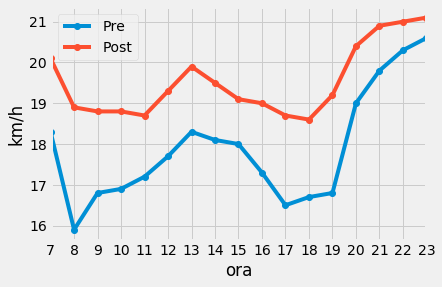

In [5]:
confronto_vmedie_pre_post.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('km/h')
plt.xticks(range(7,24,1))
plt.show()